In [77]:
%pip install intvalpy numpy matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import intvalpy as ip
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Задание №1

In [4]:
def calculateDet(delta):
        mid_A = [[1, 1.05], [1, 0.95]]
        rad_A = [[0, 0], [delta, delta]]
        A = ip.Interval(mid_A, rad_A, midRadQ=True)
        det_A = A[0][0] * A[1][1] - A[1][0] * A[0][1]
        return det_A


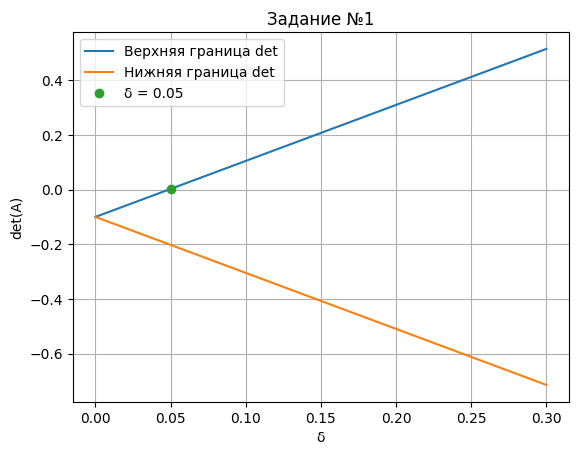

In [5]:
delta_arr = np.linspace(0, 0.3, num=10)
det_arr_hight = []
det_arr_low = []
for delta in delta_arr:
    detA = calculateDet(delta)
    det_arr_hight.append(detA.b)
    det_arr_low.append(detA.a)
plt.figure()
plt.title("Задание №1")
plt.grid()
plt.plot(delta_arr, det_arr_hight, label = "Верхняя граница det")
plt.plot(delta_arr, det_arr_low, label = "Нижняя граница det")
plt.plot(0.05, calculateDet(0.05).b, 'o', label = "δ = 0.05")
plt.xlabel('δ')
plt.ylabel('det(A)')
plt.legend()
plt.show()

In [6]:
def det(matrix):
    return matrix[0][0] * matrix[1][1] - matrix[1][0] * matrix[0][1]

def is_special(A):
    vertexes = A.vertex
    i = 0
    while i < len(vertexes):
        j = i + 1
        while j < len(vertexes):
            if det(vertexes[i]) * det(vertexes[j]) <= 0:
                return True
            j += 1
        i += 1
    return False

In [7]:
eps_arr = [0.01, 0.045, 0.05, 0.06]

In [8]:
for eps in eps_arr:
    mid = [[1.05, 1],
          [0.95, 1]]
    rad = [[eps, 0],
          [eps, 0]]

    A = ip.Interval(mid, rad,  midRadQ = True)
    print(f"При eps = {eps} " + ("Матрица особенная" if is_special(A) else "Матрица не особенная"))

При eps = 0.01 Матрица не особенная
При eps = 0.045 Матрица не особенная
При eps = 0.05 Матрица особенная
При eps = 0.06 Матрица особенная


# Задание №2

In [9]:
def glob_opt(func, eps, x0):
    yList = []
    y = x0
    fY = func(x0)
    L = [(y, fY)]
    while fY.wid >= eps:
        l = 0
        for i in range(1, len(y)):
            if y[i].wid > y[l].wid:
                l = i
        y1 = deepcopy(y)
        y1[l] = ip.Interval(y[l].a, y[l].mid)
        fY1 = func(y1)
        y2 = deepcopy(y)
        y2[l] = ip.Interval(y[l].mid, y[l].b)
        fY2 = func(y2)
        L = L[1:]
        L.append((y1, fY1))
        L.append((y2, fY2))
        L.sort(key=lambda tup : tup[1].a)
        yList.append(y.mid)
        y, fY = L[0]
    yList.append(y.mid)
    return y, yList, L

def baele(x, y):
    return (1.5 - x + x * y) ** 2 + (2.25 - x + x * y * y) ** 2 + (2.625 - x + x * y * y * y) ** 2

def himmelblau(x, y):
    return (x * x + y - 11) * (x * x + y - 11) + (x + y * y - 7) * (x + y * y - 7)


def plotGraph(func, x_int, y_int):
    x, y = np.mgrid[x_int[0]:x_int[1]:100j, y_int[0]:y_int[1]:100j]
    z = func(x, y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap="viridis")
    plt.show()
    return

def plotBoxes(boxes):
    for interval in boxList:
        box = []
        box.append((interval[0].a[0], interval[0].a[1]))
        box.append((interval[0].a[0], interval[0].b[1]))
        box.append((interval[0].b[0], interval[0].b[1]))
        box.append((interval[0].b[0], interval[0].a[1]))
        box.append((interval[0].a[0], interval[0].a[1]))
        xs, ys = zip(*box)
        ax.plot(xs, ys, '-')
        intMid = interval[0].mid
        ax.plot(intMid[0], intMid[1], 'o')
    plt.show()

**Функция Била**

Глобальные минимум в точке -  [mpf('2.9951171875') mpf('0.4990234375')]
Значение '[0, 7.64207e-05]'


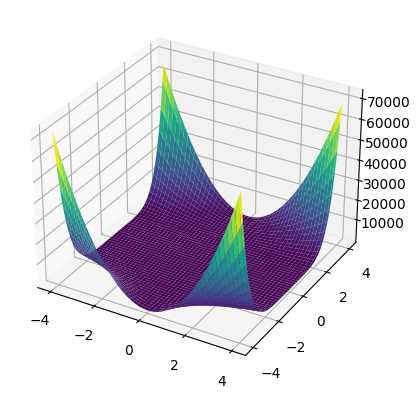

NameError: name 'boxList' is not defined

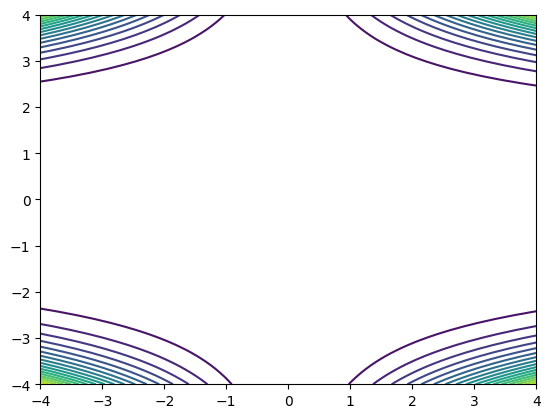

In [10]:
mid = np.zeros(2)
rad = np.ones(2) * 4
yOpt, _, boxes = glob_opt(lambda x: baele(*x), 0.0001, ip.Interval(mid, rad, midRadQ=True))
print("Глобальные минимум в точке - ", yOpt.mid)
print("Значение", baele(*yOpt))
plotGraph(baele, [-4,4], [-4,4])

x, y = np.mgrid[-4:4:100j, -4:4:100j]
z = baele(x, y)
fig, ax = plt.subplots()
ax.contour(x, y, z, levels = 20)

plotBoxes(boxes)

**Функция Химмельбау**

In [ ]:
mid = np.zeros(2)
rad = np.ones(2) * 4
yOpt, _, boxes = glob_opt(lambda x: himmelblau(*x), 0.0001, ip.Interval(mid, rad, midRadQ=True))
print("Глобальные минимум в точке - ", yOpt.mid)
print("Значение", himmelblau(*yOpt))
plotGraph(himmelblau, [-4,4], [-4,4])
x, y = np.mgrid[-4:4:100j, -4:4:100j]
z = himmelblau(x, y)
fig, ax = plt.subplots()
ax.contour(x, y, z, levels = 20)

plotBoxes(boxes)